In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random

## Box filtering

In [7]:
def get_box_filtering(x, K):   
    y = x[:]
    for i in range(K,x.shape[0]-K):
        for j in range(K,x.shape[1]-K):
            y[i,j] = get_box(x, i, j, K)           
    return y

def get_box(x, i, j, K):
    m = (K-1)//2
    ax = i-m
    bx = i+m
    ay = j-m
    by = j+m 
    newRGB = [0,0,0]    
    for i in range(ax, bx+1):
        for j in range(ay, by+1):
            for k in range(3):
                newRGB[k] += x[i][j][k]               
    for i in range(3):
        newRGB[i] /= K*K
    return newRGB

### Original

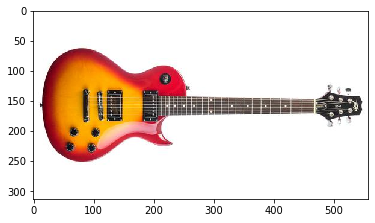

In [8]:
img = cv2.imread('data/pict2.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)

### Filtered

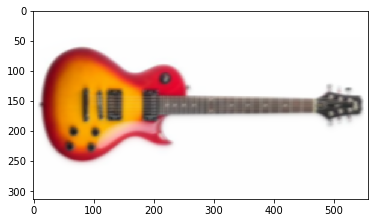

In [9]:
blur = get_box_filtering(img_rgb.copy(), 7)
plt.imshow(blur)

## Median filtering

In [14]:
def get_median_filtering(x, K):   
    y = x[:]
    for i in range(K,x.shape[0]-K):
        for j in range(K,x.shape[1]-K):
            y[i,j] = get_median(x, i, j, K)           
    return y

def get_median(x, i, j, K):
    m = (K-1)//2
    ax = i-m
    bx = i+m
    ay = j-m
    by = j+m 
    RGBsum = 0
    sums = []
    newRGB = [0,0,0]    
    for i in range(ax, bx+1):
        for j in range(ay, by+1):
            sums.append(np.sum(x[i][j]))
    sums.sort()
    return sums[K+m]

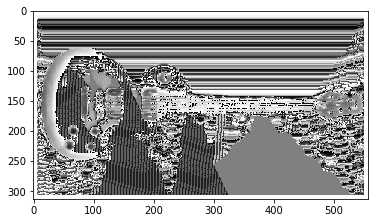

In [15]:
blur = get_median_filtering(img_rgb.copy(), 7)
plt.imshow(blur)